In [14]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US', tz=360)


In [59]:
kw_list = ["Bread","Ferrari"]
pytrends.build_payload(kw_list=kw_list, timeframe=['today 3-m', 'today 3-m'], geo = 'US')
overTime = pytrends.interest_over_time()

/Users/mishangagnon/opt/anaconda3/envs/si206/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [68]:
kw_list = ["food near me"]
pytrends.build_payload(kw_list=kw_list, timeframe=['today 3-m'], geo = 'US')
overTime = pytrends.interest_by_region(resolution='CITY')

In [11]:
print(test)

None


In [64]:
overTime = pytrends.interest_over_time()


/Users/mishangagnon/opt/anaconda3/envs/si206/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [84]:
interest_over_time_df.head()

,ice cream,isPartial
date,,
2023-04-23,55,False
2023-04-30,63,False
2023-05-07,76,False
2023-05-14,70,False
2023-05-21,81,False


/Users/mishangagnon/opt/anaconda3/envs/si206/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


<Axes: xlabel='date'>

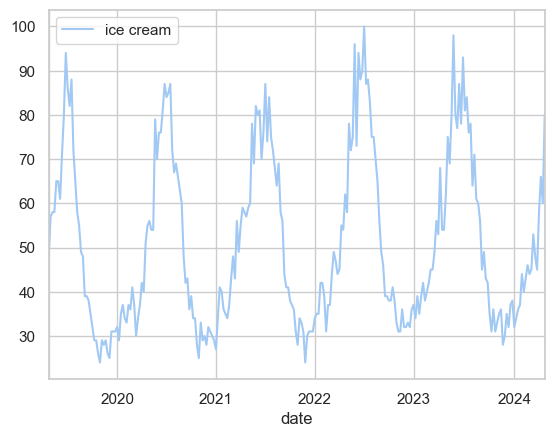

In [118]:
from pytrends.request import TrendReq
import pandas as pd

# Initialize a TrendReq object
pytrend = TrendReq(hl='en-US', tz=360)  # 'hl' is the host language, 'tz' is the timezone offset

# Define the search keyword and the region
keyword = 'ice cream'
geo = 'US-MI-505'  # Michigan, USA as the region, you might need to adjust this for more specific local data

# Build the payload
pytrend.build_payload(kw_list=[keyword], geo=geo, timeframe='today 5-y')  # Adjust timeframe as needed

# Get interest over time
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.drop('isPartial', axis =1, inplace=True)

# Display the data
interest_over_time_df.plot(kind = 'line')


In [ ]:
from sqlalchemy import create_engine

#store all data

engine = create_engine('sqlite:///mylocaldatabase.db')
interest_over_time_df.to_sql('popularity', con=engine, index=True, if_exists='append')


In [132]:
def set_up_database(db_name):
    path = os.path.dirname(os.path.abspath(__file__))
    conn = sqlite3.connect(path + "/" + db_name)
    cur = conn.cursor()
    return conn

def create_table_from_df(df, table_name, conn):
    # Start the CREATE TABLE statement
    sql = f"CREATE TABLE IF NOT EXISTS {table_name} ("
    
    # Add columns with appropriate data types
    columns = []
    for col_name, dtype in df.dtypes.items():
        col_type = 'TEXT'  # Default type
        if pd.api.types.is_integer_dtype(dtype):
            col_type = 'INTEGER'
        elif pd.api.types.is_float_dtype(dtype):
            col_type = 'REAL'
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            col_type = 'DATETIME'
        # Add column specification
        columns.append(f"{col_name} {col_type}")
    
    # Complete the SQL statement
    sql += ", ".join(columns)
    sql += ")"
    
    # Execute the SQL statement
    cur = conn.cursor()
    cur.execute(sql)
    conn.commit()

def insert_data_from_df(df, table_name, conn):

    # Create a cursor object using the connection
    cur = conn.cursor()
    
    # Prepare the INSERT INTO statement
    placeholders = ', '.join(['?'] * len(df.columns))
    columns = ', '.join(df.columns)
    sql = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"
    
    # Insert each row from the DataFrame
    for row in df.itertuples(index=False, name=None):
        cur.execute(sql, row)
    
    # Commit the transactions
    conn.commit()

def get_oldest_date(table_name, date_col_name, conn):

    # Create a cursor object using the connection
    cur = conn.cursor()
    
    # Execute the query to find the oldest date
    cur.execute(f"SELECT MIN({date_col_name}) FROM {table_name}")
    
    # Fetch the result
    result = cur.fetchone()
    
    # Check if the result is not None
    if result and result[0]:
        return result[0]
    else:
        return None

def shift_date_back_pandas(date_str, days):
    """
    Shifts a given date by a specified number of days using pandas.
    
    Parameters:
    date_str (str): The date in 'YYYY-MM-DD' format.
    days (int): The number of days to shift the date. Negative for past, positive for future.
    
    Returns:
    str: The shifted date in 'YYYY-MM-DD' format.
    """
    # Convert the date string to a pandas Timestamp
    date = pd.to_datetime(date_str)
    
    # Shift the date by the specified number of days
    new_date = date_pd.Timedelta(days=days)
    
    # Convert the Timestamp back to a string in 'YYYY-MM-DD' format
    return new_date.strftime('%Y-%m-%d')

In [129]:
#test all functions 
TABLE_NAME = "test"
conn = set_up_database('test')
create_table_from_df()

In [126]:
new_df.tail()

,date,ice cream
257,2024-03-31,45
258,2024-04-07,58
259,2024-04-14,66
260,2024-04-21,60
261,2024-04-28,80
